In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Regression Analysis

The concept of regression analysis comes from the fact that the coef calculated though the linear regression are the coef of the sample data and not of the population data.

In any ML model what we try to estimate is the best value of the coef that is very close to the actual value of the population coef value.

Let's say that the actual mathematical function is
> $$\hat y = 5x - 10$$

But the data also includes some error which is unexplained mathematically and is called as the irreducible error.

So the actual equation is
> $$\hat y = 5x - 10 + \epsilon$$
where $\epsilon$ is the irreducible error.

-----

Through our models also we can only come near to the actual equation but it is very hard to predict the actual equation from the sample data.

>The actual equation is $f(x)=5x - 10 + ϵ$   
But the prediction we get from the model is $f^{'}(x)$ which differs from the actual population data.

What we try to do is that we try to minimize the difference between the actual equation and the equation calculated by our model and that is called as **reducible error** because that error term can be reduced.

$$error=f(x) - f^{'}(x)$$



In [2]:
from sklearn.linear_model import LinearRegression

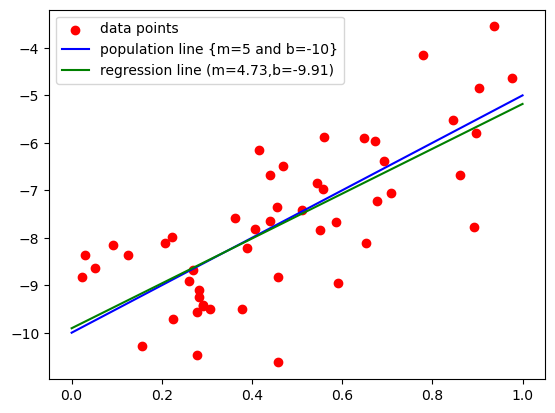

In [3]:
# create the data
np.random.seed(3)
X = np.random.rand(50)
y_pop = ((5 * X) - 10) + np.random.randn(50) 

# plot the data points
plt.scatter(X,y_pop,color='red',label='data points')

# fit the regression model
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y_pop)
y_pred = lr.predict(X.reshape(-1,1))


# calculate the population line and plot it
X_test = np.linspace(0,1,50)
pop_line = (5 * X_test) - 10
plt.plot(X_test,pop_line,color='blue',label='population line {m=5 and b=-10}')

# calculate and plot the regression line
reg_line = lr.predict(X_test.reshape(-1,1))
plt.plot(X_test,reg_line,color='green',label=f'regression line (m={lr.coef_[0]:.2f},b={lr.intercept_:.2f})')

plt.legend()
plt.show()

In our case the value of the reducible error is very less which indicates that our model is closely able to predict the population parameters from the sample data

## What are TSS, RSS and ESS
TSS = Total Sum of Squares. The total variance of the data.

RSS = Residual Sum of Squares. The distance between the data point and the best fit line. This distance shows how much variance of the output variable was left unexplained by our input features.

ESS =  Explained Sum of Squares. This is the variance that is explained by our model. This the variance on the data that can be easily explained by our input variables.

> $TSS = ESS + RSS$

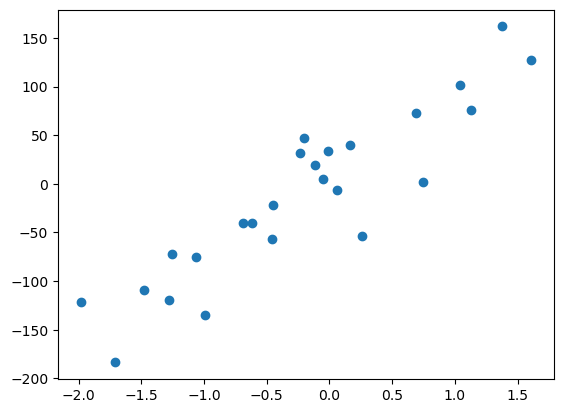

In [4]:
from sklearn.datasets import make_regression

# generate the data
X,y = make_regression(n_samples=25,n_features=1,
                      n_informative=1,noise=40,
                      random_state=21)

# plot the data
plt.scatter(X,y)
plt.show()

In [5]:
# shape of the data
X.shape,y.shape

((25, 1), (25,))

In [6]:
# create the data frame

df = pd.DataFrame({'X':X.ravel(),'y':y})
df

,X,y
0,0.691924,73.247893
1,-0.457723,-57.201151
2,0.745388,1.496628
3,1.373688,161.709181
4,-1.711054,-183.695024
5,-0.689228,-40.740176
6,-0.234571,32.066468
7,1.128144,75.545378
8,1.610992,127.284515
9,-0.989368,-135.204927


In [7]:
# calculate the mean value of the output column
y_mean = np.mean(y)
y_mean

# calculate the distance of data point from mean
df['TSS'] = df['y'] - y_mean
df

,X,y,TSS
0,0.691924,73.247893,86.004141
1,-0.457723,-57.201151,-44.444903
2,0.745388,1.496628,14.252875
3,1.373688,161.709181,174.465428
4,-1.711054,-183.695024,-170.938776
5,-0.689228,-40.740176,-27.983929
6,-0.234571,32.066468,44.822716
7,1.128144,75.545378,88.301625
8,1.610992,127.284515,140.040762
9,-0.989368,-135.204927,-122.448679


In [8]:
# fit a regression line

lr = LinearRegression()

lr.fit(X,y)

y_pred = lr.predict(X)

df['ESS'] = y_pred
df

,X,y,TSS,ESS
0,0.691924,73.247893,86.004141,61.597893
1,-0.457723,-57.201151,-44.444903,-32.122361
2,0.745388,1.496628,14.252875,65.956324
3,1.373688,161.709181,174.465428,117.175972
4,-1.711054,-183.695024,-170.938776,-134.294994
5,-0.689228,-40.740176,-27.983929,-50.994860
6,-0.234571,32.066468,44.822716,-13.930814
7,1.128144,75.545378,88.301625,97.158967
8,1.610992,127.284515,140.040762,136.521165
9,-0.989368,-135.204927,-122.448679,-75.462553


In [9]:
# calculate the residuals

df['RSS'] = df['y'] - df['ESS']
df

,X,y,TSS,ESS,RSS
0,0.691924,73.247893,86.004141,61.597893,11.650000
1,-0.457723,-57.201151,-44.444903,-32.122361,-25.078790
2,0.745388,1.496628,14.252875,65.956324,-64.459696
3,1.373688,161.709181,174.465428,117.175972,44.533208
4,-1.711054,-183.695024,-170.938776,-134.294994,-49.400030
5,-0.689228,-40.740176,-27.983929,-50.994860,10.254684
6,-0.234571,32.066468,44.822716,-13.930814,45.997283
7,1.128144,75.545378,88.301625,97.158967,-21.613590
8,1.610992,127.284515,140.040762,136.521165,-9.236651
9,-0.989368,-135.204927,-122.448679,-75.462553,-59.742373


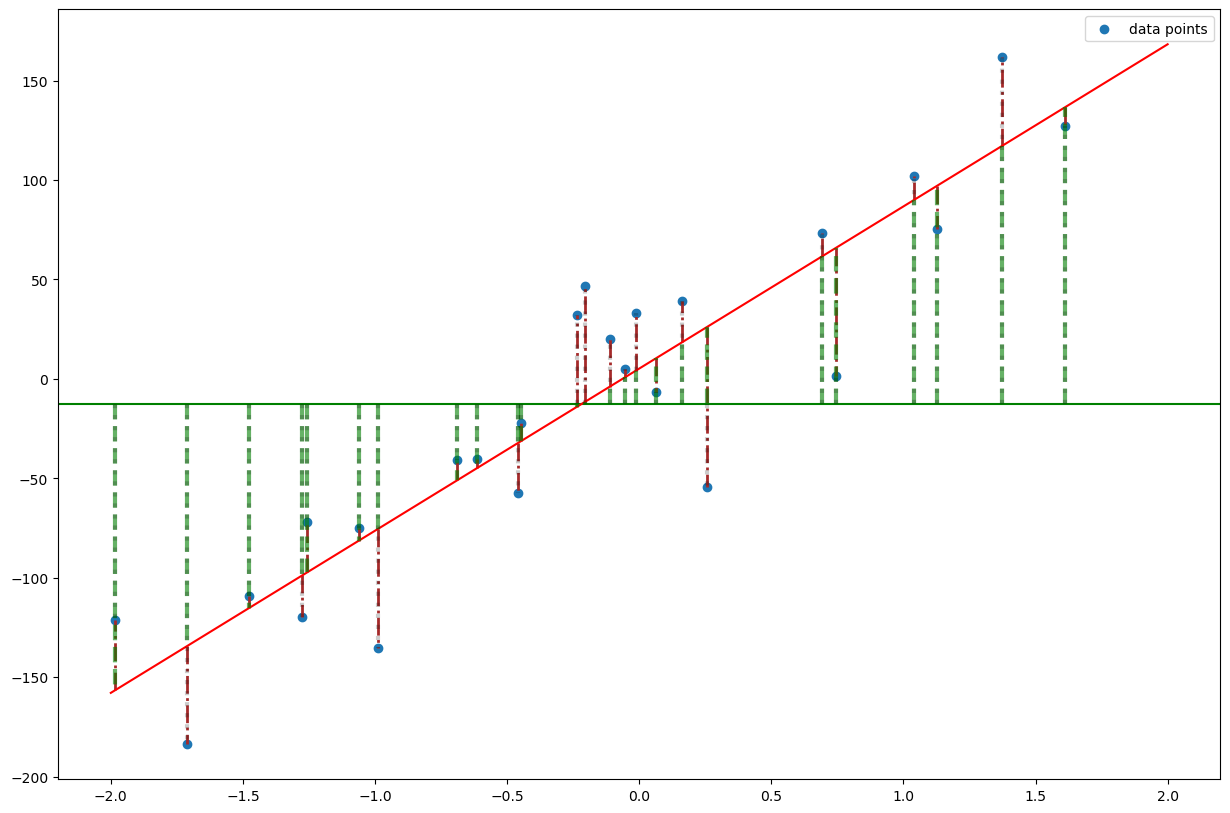

In [32]:
# plot the mean line on the data
plt.figure(figsize=(15,10))
plt.scatter(X,y,label='data points')
plt.axhline(y=y_mean,color='green')

# plot the regression line
X_test = np.linspace(-2,2,100)
plt.plot(X_test,lr.predict(X_test.reshape(-1,1)),color='red')

for i in range(df.shape[0]):
    plt.plot((df['X'][i],df['X'][i]),(y_mean,df['y'][i]),
            color='k',linestyle=':',zorder=3,linewidth=3,alpha=0.2)
    plt.plot((df['X'][i],df['X'][i]),(y_mean,df['ESS'][i]),
             color='green',linestyle='--',zorder=2,linewidth=3,alpha=0.6)
    plt.plot((df['X'][i],df['X'][i]),(df['ESS'][i],df['y'][i]),
             color='brown',linestyle='-.',zorder=1,linewidth=2)

plt.legend()
plt.show()
    